In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
anime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Recommendation System/Data/Raw/anime.csv')

In [10]:
anime['type'] = anime['type'].fillna('')

In [12]:
type_count = anime[['anime_id', 'type']].groupby(['type']).agg(['count'])

In [23]:
number_of_type = type_count['anime_id']['count'].values

In [21]:
type_count['anime_id']

,count
type,
,25
Movie,2348
Music,488
ONA,659
OVA,3311
Special,1676
TV,3787


In [95]:
types = type_count.index

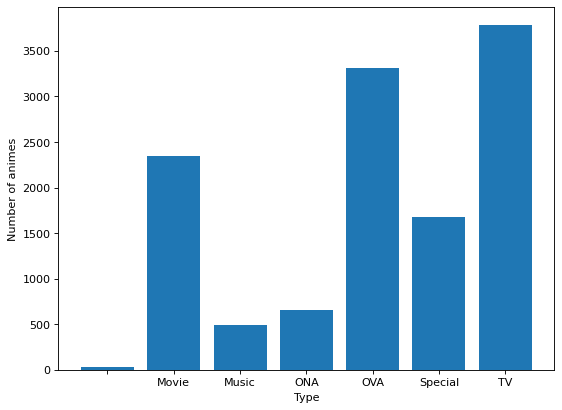

In [96]:
figure(figsize=(8, 6), dpi=80)
plt.bar(types, number_of_type)
plt.xlabel("Type")
plt.ylabel("Number of animes")
plt.show()

In [30]:
anime['genre'] = anime['genre'].fillna('')

In [31]:
genre_set = set()
for genres in anime['genre']:
    genres = genres.split(', ')
    genre_set.update(genres)
genre_set.remove('')
print(type(genre_set))
genre_list = sorted(genre_set)

genre_index_dict = {}
for i in range(len(genre_list)):
    genre_index_dict[genre_list[i]] = i
print(genre_index_dict)
print(type(genre_list))


def encode_genre(genres):
    result = np.asarray([0] * len(genre_list))
    if genres == '':
        return result
    genres = genres.split(', ')
    for genre in genres:
        result[genre_index_dict[genre]] = 1
    return result


anime['encoded_genre'] = anime['genre'].apply(lambda x: list(encode_genre(x)))
print(anime.columns)
print(anime[['anime_id', 'encoded_genre']])

<class 'set'>
{'Action': 0, 'Adventure': 1, 'Cars': 2, 'Comedy': 3, 'Dementia': 4, 'Demons': 5, 'Drama': 6, 'Ecchi': 7, 'Fantasy': 8, 'Game': 9, 'Harem': 10, 'Hentai': 11, 'Historical': 12, 'Horror': 13, 'Josei': 14, 'Kids': 15, 'Magic': 16, 'Martial Arts': 17, 'Mecha': 18, 'Military': 19, 'Music': 20, 'Mystery': 21, 'Parody': 22, 'Police': 23, 'Psychological': 24, 'Romance': 25, 'Samurai': 26, 'School': 27, 'Sci-Fi': 28, 'Seinen': 29, 'Shoujo': 30, 'Shoujo Ai': 31, 'Shounen': 32, 'Shounen Ai': 33, 'Slice of Life': 34, 'Space': 35, 'Sports': 36, 'Super Power': 37, 'Supernatural': 38, 'Thriller': 39, 'Vampire': 40, 'Yaoi': 41, 'Yuri': 42}
<class 'list'>
Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'encoded_genre'],
      dtype='object')
       anime_id                                      encoded_genre
0         32281  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
1          5114  [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...
2         2897

In [36]:
engen_mat = np.array([np.array(x, dtype=np.int32) for x in anime['encoded_genre'].values])

In [41]:
number_of_genre = engen_mat.sum(axis=0)

In [121]:
np.average(number_of_genre)

843.8139534883721

In [ ]:
genre_list

In [123]:
anime[anime['genre'] == ''].shape

(62, 8)

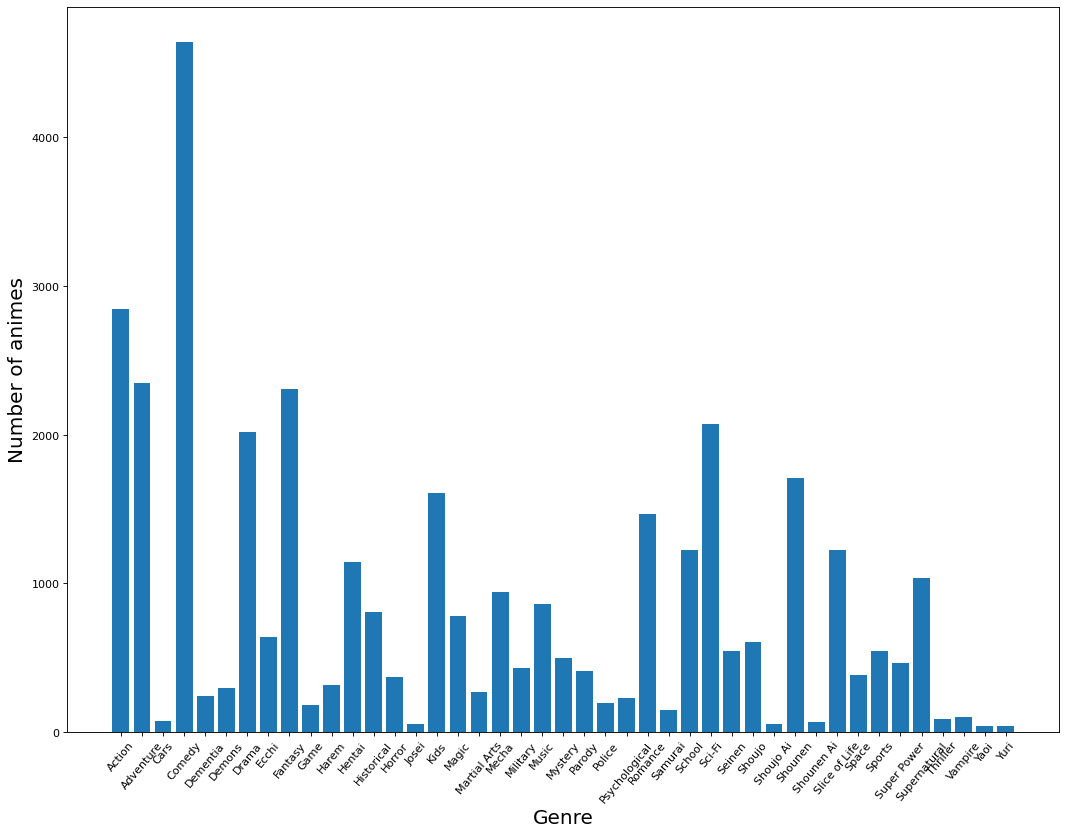

In [75]:
figure(figsize=(16, 12), dpi=80)
plt.bar(genre_list, number_of_genre)
plt.xticks(rotation=50)
plt.xlabel("Genre", fontsize=18)
plt.ylabel("Number of animes", fontsize=18)
plt.show()

In [62]:
mean_rating = anime[anime['rating'].notna()]['rating'].values

In [142]:
mean_rating.min(), mean_rating.max()

(1.67, 10.0)

In [152]:
anime['int_episodes'] = anime['episodes'].apply(lambda x: int(x) if x != 'Unknown' else 2000)

In [155]:
anime[anime['int_episodes'] <= 50].shape[0] / anime.shape[0]

0.9217504473727022

In [159]:
anime[anime['rating'].notna()][(anime['rating'] >= 4.5) & (anime['rating'] <= 8.0)].shape[0] / anime.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.89075972018871

In [144]:
anime[anime['episodes'] == '1818']

,anime_id,name,genre,type,episodes,rating,members,encoded_genre
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [161]:
anime[anime['members'] <= 50000].shape[0] / anime.shape[0]

0.9077598828696926

In [147]:
anime[anime['rating'].isin([1.67, 10.0])]

,anime_id,name,genre,type,episodes,rating,members,encoded_genre
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


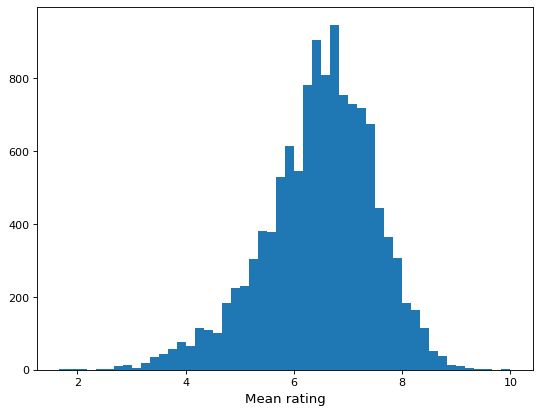

In [148]:
figure(figsize=(8, 6), dpi=80)
plt.xlabel("Mean rating", fontsize=12)
plt.hist(mean_rating, bins=50)
plt.show()

In [69]:
anime[anime['rating'].isna()].shape

(230, 8)

In [149]:
members.min(), members.max()

(5, 1013917)

In [151]:
anime[anime['members'].isin([5, 1013917])]

,anime_id,name,genre,type,episodes,rating,members,encoded_genre
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10997,34527,Gou-chan. Moko to Chinjuu no Mori no Nakama-tachi,"Adventure, Kids",Movie,1,NaN,5,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


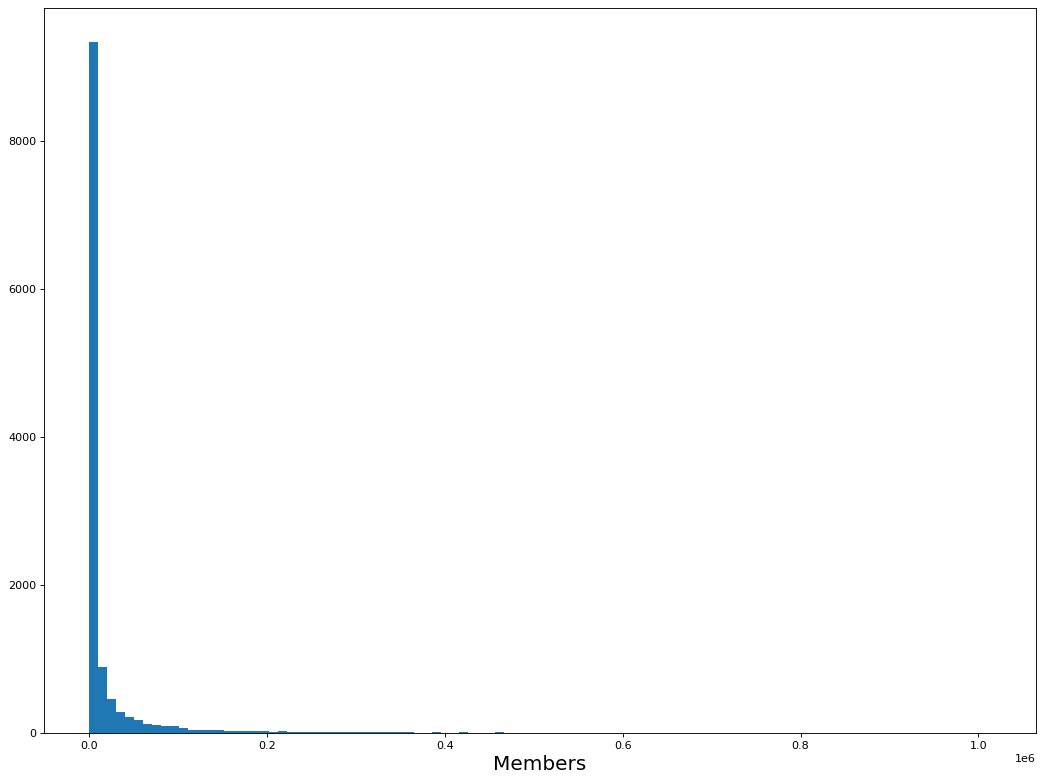

In [74]:
members = anime['members'].values
figure(figsize=(16, 12), dpi=80)
plt.xlabel("Members", fontsize=18)
plt.hist(members, bins=100)
plt.show()

In [81]:
rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Recommendation System/Data/Raw/rating.csv')

In [82]:
rate_count = rating[['user_id', 'anime_id']].groupby(['user_id']).agg(['count'])

In [87]:
number_of_rate = rate_count['anime_id']['count'].values

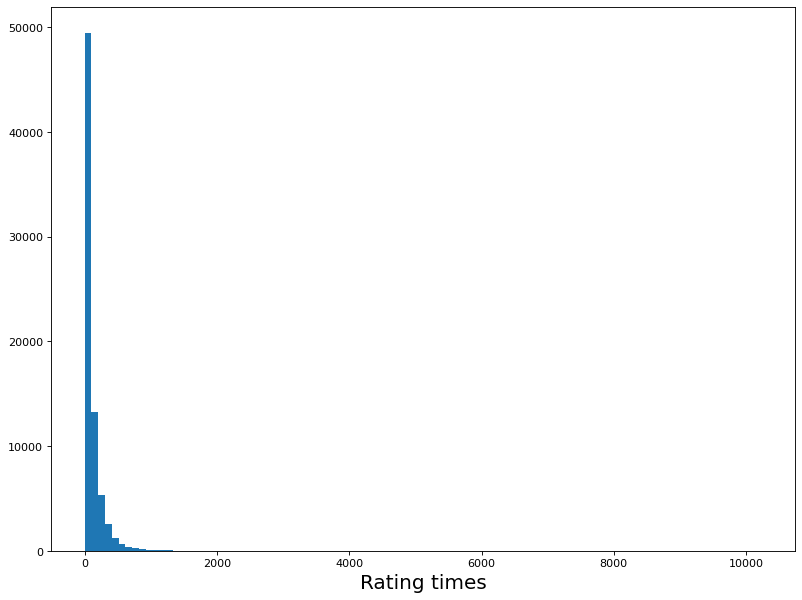

In [89]:
figure(figsize=(12, 9), dpi=80)
plt.xlabel("Rating times", fontsize=18)
plt.hist(number_of_rate, bins=100)
plt.show()

In [173]:
rate_count_1 = rate_count['anime_id']
rate_count_1[rate_count_1['count'] <= 300].shape[0] / rate_count_1.shape[0]

0.9219206964565054

In [162]:
number_of_rate.min(), number_of_rate.max(), np.average(number_of_rate)

(1, 10227, 106.28765558049378)

In [91]:
be_rated_count = rating[['user_id', 'anime_id']].groupby(['anime_id']).agg(['count'])

In [177]:
be_rated_count['user_id'][be_rated_count['user_id']['count'] == 39340]

,count
anime_id,
1535,39340


In [180]:
anime[anime['anime_id'] == 1535]

,anime_id,name,genre,type,episodes,rating,members,encoded_genre,int_episodes
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37


In [176]:
number_of_be_rated.min(), number_of_be_rated.max(), np.average(number_of_be_rated)

(1, 39340, 697.6550892857143)

In [187]:
be_rated_count_1 = be_rated_count['user_id']
be_rated_count_1[be_rated_count_1['count'] <= 5000].shape[0] / 12294

0.8809988612331219

In [99]:
number_of_be_rated = be_rated_count['user_id']['count'].values

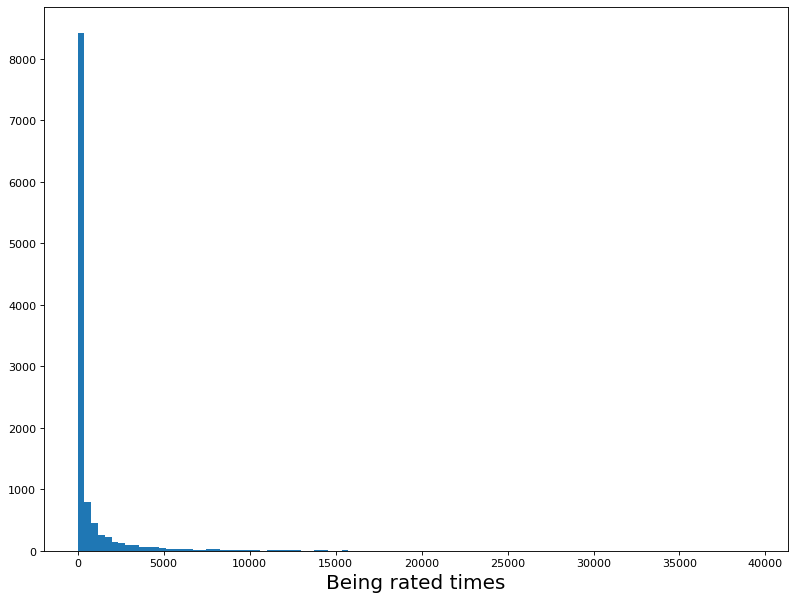

In [114]:
figure(figsize=(12, 9), dpi=80)
plt.xlabel("Being rated times", fontsize=18)
plt.hist(number_of_be_rated, bins=100)
plt.show()

In [101]:
number_of_be_rated.min(), number_of_be_rated.max()

(1, 39340)

In [103]:
rating

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [108]:
rate_value_count = rating[['rating', 'anime_id']].groupby(['rating']).agg(['count'])

In [194]:
np.average(number_of_rated_value)

710339.7272727273

In [111]:
rate_value_count.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='rating')

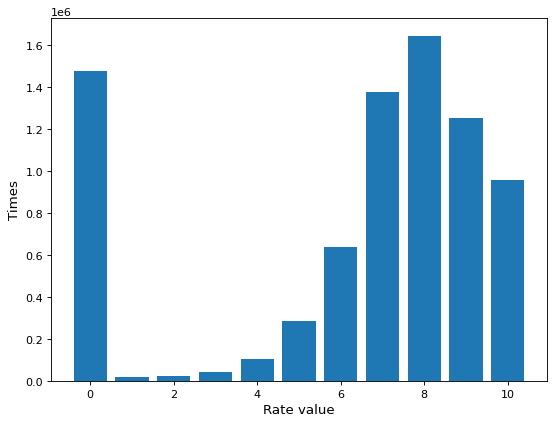

In [117]:
number_of_rated_value = rate_value_count['anime_id']['count']
figure(figsize=(8, 6), dpi=80)
plt.xlabel("Rate value", fontsize=12)
plt.ylabel("Times", fontsize=12)
plt.bar(rate_value_count.index, number_of_rated_value)
plt.show()

In [129]:
episodes = np.array(anime[anime['episodes'] != 'Unknown']['episodes'].values, dtype=np.int32)

In [130]:
episodes

array([ 1, 64, 51, ...,  4,  1,  1], dtype=int32)

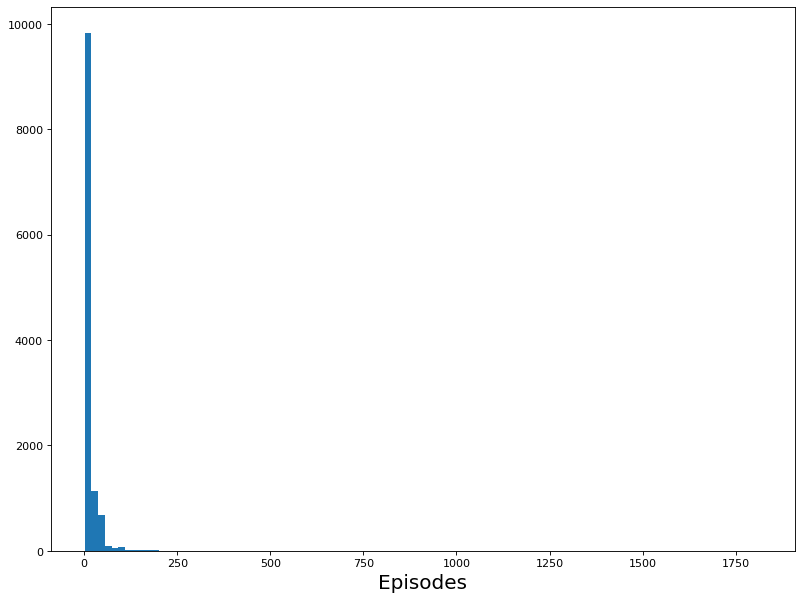

In [134]:
figure(figsize=(12, 9), dpi=80)
plt.xlabel("Episodes", fontsize=18)
plt.hist(episodes, bins=100)
plt.show()

In [135]:
episodes.min(), episodes.max()

(1, 1818)

In [140]:
anime[anime['episodes'] == 'Unknown'][['type', 'anime_id']].groupby(['type']).agg(['count'])

,anime_id
,count
type,
,25
Movie,4
Music,1
ONA,46
OVA,50
Special,5
TV,209


In [195]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anime Recommendation System/Data/Encode/short_vector.csv').shape

(11197, 2)

In [196]:
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members,encoded_genre,int_episodes
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",64
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",51


In [197]:
rating

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
